<a href="https://colab.research.google.com/github/SankaranarayananA/Mini-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification
 Two categories used for classification
are
1.   Rose
2.   Sunflower



In [1]:
 import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [2]:
#Downloading data
!wget https://codeload.github.com/SankaranarayananA/Mini-Project/zip/refs/heads/main

--2021-04-24 07:27:11--  https://codeload.github.com/SankaranarayananA/Mini-Project/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 13.112.159.149
Connecting to codeload.github.com (codeload.github.com)|13.112.159.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main’

main                    [     <=>            ] 194.78M  27.0MB/s    in 8.2s    

2021-04-24 07:27:20 (23.7 MB/s) - ‘main’ saved [204246937]



In [3]:
!unzip /content/main

Archive:  /content/main
873b6c569f589dcee12c03dc97b0f1f881ca3f48
   creating: Mini-Project-main/
  inflating: Mini-Project-main/Project.ipynb  
   creating: Mini-Project-main/dataset-20210423T181130Z-001/
   creating: Mini-Project-main/dataset-20210423T181130Z-001/roses/
  inflating: Mini-Project-main/dataset-20210423T181130Z-001/roses/1085236961_df1b2faece_o.jpg  
  inflating: Mini-Project-main/dataset-20210423T181130Z-001/roses/1524361087_9d9a2cbe6a_o.jpg  
  inflating: Mini-Project-main/dataset-20210423T181130Z-001/roses/1585475934_15c8fa2208_b.jpg  
  inflating: Mini-Project-main/dataset-20210423T181130Z-001/roses/1743996065_f96ff48eed_b.jpg  
  inflating: Mini-Project-main/dataset-20210423T181130Z-001/roses/181641557_a2fd2b3d16_o.jpg  
  inflating: Mini-Project-main/dataset-20210423T181130Z-001/roses/186415192_77e4aabf98_o.jpg  
  inflating: Mini-Project-main/dataset-20210423T181130Z-001/roses/2104104305_24ba447630_o.jpg  
  inflating: Mini-Project-main/dataset-20210423T181130Z-00

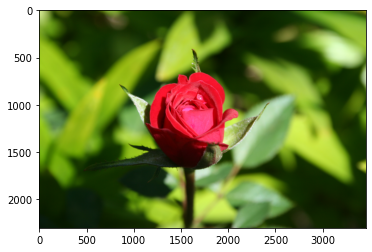

In [4]:
# Displaying the image
img1 = plt.imread('/content/Mini-Project-main/dataset-20210423T181130Z-001/roses/1085236961_df1b2faece_o.jpg')
plt.imshow(img1)

In [5]:
#Pre-processing of the data and iteration
import os
import numpy as np
datadir = '/content/Mini-Project-main/dataset-20210423T181130Z-001'

categories = ['roses','sunflower'] # Name the folder with these categories
target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # plt.imshow(img_array)
    # plt.show()
    img_resize = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)

In [11]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.188235,0.462745,0.383438,0.200000,0.476764,0.394327,0.192980,0.471032,0.384288,0.195203,0.472758,0.416675,0.186689,0.469712,0.429621,0.152758,0.450757,0.386953,0.132837,0.412647,0.299915,0.216353,0.395203,0.232850,0.271150,0.422863,0.170484,0.251856,0.473359,0.187085,0.282511,0.509804,0.239922,0.278405,0.501059,0.275432,0.254172,0.462523,0.313072,0.254026,...,0.165214,0.419386,0.117425,0.188203,0.426575,0.200713,0.202876,0.445307,0.357948,0.172183,0.438340,0.375595,0.142781,0.423529,0.360370,0.141176,0.414510,0.342745,0.126745,0.366837,0.262131,0.126224,0.375828,0.243830,0.131150,0.386928,0.227677,0.098610,0.346222,0.167373,0.080563,0.325948,0.148627,0.094491,0.346803,0.193503,0.152591,0.427101,0.319388,roses
1,0.244194,0.215309,0.242760,0.312941,0.246824,0.286039,0.364468,0.276732,0.319869,0.407400,0.282353,0.341176,0.438510,0.270588,0.345098,0.466363,0.254902,0.349020,0.482353,0.243137,0.349020,0.471765,0.227451,0.330588,0.397068,0.194797,0.269307,0.246876,0.145098,0.156522,0.127137,0.113725,0.066667,0.099285,0.109804,0.039216,0.165059,0.140523,0.078327,0.269316,...,0.035843,0.055359,0.031373,0.028000,0.043251,0.020157,0.019608,0.027451,0.012083,0.007843,0.015686,0.003922,0.000000,0.007843,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.004529,0.012471,0.000000,0.039216,0.046301,0.014485,0.035294,0.050980,0.021307,0.031373,0.054902,0.019608,0.031373,0.054902,0.023529,roses
2,0.011765,0.011765,0.011765,0.023529,0.023529,0.018461,0.027451,0.031373,0.023529,0.023529,0.035294,0.027451,0.023529,0.035294,0.023529,0.023529,0.035294,0.027451,0.023529,0.035294,0.027451,0.023529,0.031373,0.027451,0.023529,0.030759,0.024927,0.023529,0.023529,0.019608,0.019608,0.023529,0.019608,0.023529,0.027451,0.019608,0.024196,0.031373,0.023529,0.031373,...,0.050980,0.061451,0.043137,0.039216,0.050980,0.039216,0.035294,0.047059,0.039216,0.037313,0.050980,0.039216,0.050980,0.065476,0.043137,0.090596,0.120157,0.062745,0.138588,0.166039,0.078276,0.071294,0.075456,0.041015,0.011765,0.011765,0.011765,0.007843,0.007843,0.007843,0.011765,0.011765,0.011765,0.019608,0.019608,0.019608,0.023529,0.023529,0.023529,roses
3,0.196078,0.329412,0.231373,0.211529,0.345098,0.239216,0.227451,0.364706,0.266978,0.238773,0.372549,0.277882,0.250431,0.380392,0.278431,0.247059,0.384314,0.278431,0.247059,0.388235,0.274510,0.243137,0.385490,0.278431,0.239216,0.380392,0.274879,0.231373,0.384314,0.266692,0.231373,0.388235,0.274510,0.223529,0.388235,0.262048,0.212876,0.376471,0.231373,0.215686,...,0.105882,0.216235,0.074510,0.102074,0.211765,0.070588,0.113725,0.219289,0.074191,0.144575,0.258824,0.125673,0.183033,0.298039,0.180392,0.201561,0.325490,0.215302,0.203922,0.329412,0.231373,0.202415,0.325490,0.235294,0.208392,0.329412,0.244293,0.212314,0.329412,0.258824,0.203922,0.329412,0.253441,0.203922,0.329412,0.239013,0.192157,0.319253,0.227451,roses
4,0.168627,0.247059,0.117647,0.172627,0.250980,0.125490,0.180392,0.256933,0.128392,0.180392,0.258824,0.129412,0.180392,0.258824,0.129351,0.180392,0.257804,0.125490,0.176471,0.254902,0.125490,0.176471,0.258824,0.125490,0.176471,0.262745,0.125490,0.172549,0.262745,0.121569,0.168078,0.262602,0.117647,0.164706,0.258824,0.114431,0.156863,0.256353,0.109804,0.152941,...,0.133333,0.282353,0.043137,0.137255,0.286275,0.039738,0.141034,0.297490,0.043137,0.141176,0.308469,0.039216,0.141176,0.314588,0.043137,0.145098,0.317647,0.047059,0.143415,0.317647,0.047059,0.141176,0.313725,0.047059,0.137316,0.309804,0.043137,0.133333,0.305882,0.043137,0.133333,0.298039,0.043137,0.125569,0.291274,0.039216,0.121569,0.286275,0.035294,roses


In [12]:
#Taking Inputs
x = flat_data
y = target

In [13]:
#Spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42,stratify=y)

In [14]:
#Algorithm used-Support Vector Machine
from sklearn.svm import SVC

In [15]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
model = SVC()
param = {
    'kernel':['linear','poly','rbf'],
      'C' : [0.1,1,10,100]
}

grid = GridSearchCV(model,param,cv= 5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [16]:
#Model Training and Prediction
from sklearn.svm import SVC
model = SVC(C=1,kernel='rbf')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [25]:
#Training accuracy
model.score(x_train,y_train)

1.0

In [26]:
#Testing accuracy
model.score(x_test,y_test)

0.9803921568627451

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.9803921568627451

In [18]:
confusion_matrix(y_pred,y_test)

array([[25,  0],
       [ 1, 25]])

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       roses       1.00      0.96      0.98        26
   sunflower       0.96      1.00      0.98        25

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



In [20]:
!wget https://www.gardeningknowhow.com/wp-content/uploads/2019/11/red-rose.jpg

--2021-04-24 07:34:32--  https://www.gardeningknowhow.com/wp-content/uploads/2019/11/red-rose.jpg
Resolving www.gardeningknowhow.com (www.gardeningknowhow.com)... 151.139.128.11
Connecting to www.gardeningknowhow.com (www.gardeningknowhow.com)|151.139.128.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 290760 (284K) [image/jpeg]
Saving to: ‘red-rose.jpg’

red-rose.jpg        100%[===================>] 283.95K  --.-KB/s    in 0.04s   

2021-04-24 07:34:32 (7.15 MB/s) - ‘red-rose.jpg’ saved [290760/290760]



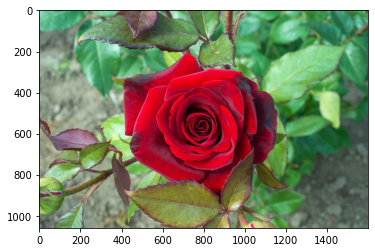

In [37]:
#New Image
img = plt.imread('/content/red-rose.jpg')
plt.imshow(img)

In [38]:
#Transforming the new image
img_array = imread('/content/red-rose.jpg')
img_resize = resize(img_array,(150,150,3)) 
img_resize = np.ndarray.flatten(img_resize)

In [39]:
#Prediction
model.predict(img_resize.reshape(1,-1))

array(['roses'], dtype='<U9')